## Enunciado

>Considere el proyecto cuya información se adjunta.
> 1. Dibuje el diagrama Pert y determine el camino crítico.
> 2. ¿Cuál será la probabilidad de terminar el proyecto entre 10 y 12 periodos. ¿Y la de terminar en 9 periodos?.
>
> 3. Como no está conforme con la duración del proyecto que resulta, desea reducir la duración del proyecto en 2 periodos con el mínimo incremento de coste posible. ¿Qué tareas deben ser reducidas?. Razónese.
>
> 4. Debido a que la empresa está realizando otros dos proyectos al mismo tiempo, la disponibilidad de mano de obra no es todo lo grande que sería de desear, por lo que en las cinco primeras semanas sólo se puede contar con 10 operarios. ¿Se encuentra bien nivelado el recurso “mano de obra”?. ¿Se encuentra bien asignado este recurso?. En ambos casos explicar el porqué; y en caso de que no estuvieran bien asignados, proponer una posible modificación de la planificación de las tareas para una correcta asignación.

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')
pmule_path = r'/content/gdrive/MyDrive/COMPARTIDOS/COMPARTIDO_AREA/DOCENCIA/Direccion_de_Proyectos/pmule/compartido_publico_alumnos/'

import sys
sys.path.insert(1, pmule_path + "src")
!source {pmule_path}venv/bin/activate
!apt install libgraphviz-dev
!python -m pip install pygraphviz "pandas[excel]==2.2.2"

Mounted at /content/gdrive/
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 k

In [5]:
# Alargamos el ancho de las celdas al 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, desviacion, cur,   recursos, duracion_tope
  (   'A',      '---  ',      3,         1,        25,       3,        2    ),
  (   'B',      '---  ',      1,         1,        20,       1,        1    ),
  (   'C',      '---  ',      2,         1,         7,       6,        1    ),
  (   'D',      '---  ',      1,         1,        25,       1,        1    ),
  (   'E',      'A,B  ',      3,         2,        10,       2,        2    ),
  (   'F',      'B,C  ',      5,         1,        25,       5,        3    ),
  (   'G',      'C,D  ',      1,         1,        30,       2,        1    ),
  (   'H',      'E    ',      1,         1,         5,       5,        1    ),
  (   'I',      'G    ',      3,         1,        50,       3,        2    ),
  (   'J',      'F,H,I',      2,         1,         5,      10,        1    ),
  (   'K',      'G    ',      1,         1,        10,       5,        1    ),
] ,columns=['activity', 'predecessor', 'duration', 'standard_deviation', 'ucr', 'resources', 'cap_duration']).set_index('activity')

datos_enunciado

,predecessor,duration,standard_deviation,ucr,resources,cap_duration
activity,,,,,,
A,---,3,1,25,3,2
B,---,1,1,20,1,1
C,---,2,1,7,6,1
D,---,1,1,25,1,1
E,"A,B",3,2,10,2,2
F,"B,C",5,1,25,5,3
G,"C,D",1,1,30,2,1
H,E,1,1,5,5,1
I,G,3,1,50,3,2


## Solución
### Apartado 1

> Dibuje el diagrama Pert y determine el camino crítico.




In [6]:
from pmule import PredecessorTable, ProjectGraph

In [7]:
datos_proyecto = datos_enunciado.copy()
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='activity', predecessor='predecessor')
proyecto = prelaciones.create_project()

En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

#### Grafo PERT con numeración de nodos

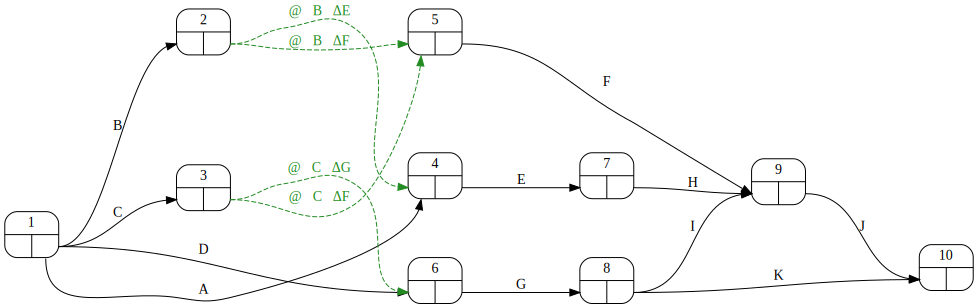

In [8]:
proyecto.pert(ranksep=1.5, nodesep=0.8)

##### Matriz de Zaderenko

In [9]:
proyecto.zaderenko(durations=datos_proyecto['duration'])

,1,2,3,4,5,6,7,8,9,10,early
1,,1.0,2.0,3.0,,1.0,,,,,0.0
2,,,,0.0,0.0,,,,,,1.0
3,,,,,0.0,0.0,,,,,2.0
4,,,,,,,3.0,,,,3.0
5,,,,,,,,,5.0,,2.0
6,,,,,,,,1.0,,,2.0
7,,,,,,,,,1.0,,6.0
8,,,,,,,,,3.0,1.0,3.0
9,,,,,,,,,,2.0,7.0
10,,,,,,,,,,,9.0


In [10]:
resultados_pert = proyecto.calculate_pert(durations=datos_proyecto['duration'])
resultados_pert['nodes']

,early,late
1,0,0
2,1,2
3,2,2
4,3,3
5,2,2
6,2,3
7,6,6
8,3,4
9,7,7
10,9,9


##### Holguras

In [11]:
resultados_pert['activities'][['H_total']]

,H_total
@∇B⤑ΔE,2
@∇B⤑ΔF,1
@∇C⤑ΔF,0
@∇C⤑ΔG,1
A,0
B,1
C,0
D,2
E,0
F,0


###### Camino crítico

In [12]:
camino_critico = proyecto.critical_path(durations=datos_proyecto['duration'])
camino_critico

{'Route_3': ['C', '@∇C⤑ΔF', 'F', 'J'], 'Route_8': ['A', 'E', 'H', 'J']}

##### Grafo PERT con indicación de tiempos

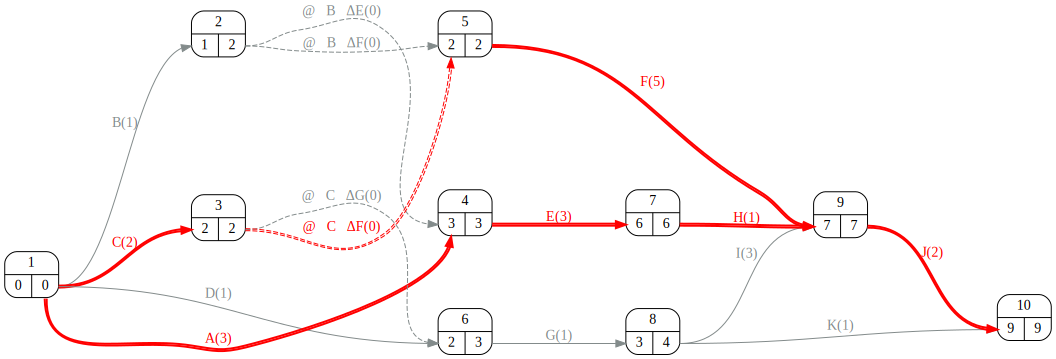

In [13]:
proyecto.pert(durations=datos_proyecto['duration'], ranksep=1.5, nodesep=1)

### Apartado 2
> 2. ¿Cuál será la probabilidad de terminar el proyecto entre 10 y 12 periodos. ¿Y la de terminar en 9 periodos?.

La duración media del proyecto ya la tenemos calculada:

In [14]:
duracion_media_proyecto = proyecto.duration(durations=datos_proyecto['duration'])
duracion_media_proyecto

9

Para determinar la desviación típica de la duración del proyecto debemos obtener en cada rama del camino crítico la suma de las varianzas, y quedarnos con la mayor.

In [15]:
datos_proyecto['variance'] = datos_proyecto.eval('standard_deviation ** 2')
desviacion_proyecto = proyecto.standard_deviation(durations=datos_proyecto['duration'],
                                                  variances=datos_proyecto['variance'])
desviacion_proyecto

Variance path: Route_3 : 3
Variance path: Route_8 : 7
Project duration variance: 7
Project duration standard deviation: 2.6457513110645907


2.6457513110645907

El proyecto sigue una distribución normal con media 9 y desviación típica 2.65.

Una vez caracterizada la distribución normal con la que aproximamos la duración del proyecto, podemos hacer el cálculo de la probabilidad:

In [16]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_12 = norm.cdf(12, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_antes_de_10 = norm.cdf(10, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_entre_10_y_12 = probabilidad_de_terminar_antes_de_12 - probabilidad_de_terminar_antes_de_10
probabilidad_de_terminar_entre_10_y_12 * 100

22.430886407670837

In [17]:
probabilidad_de_terminar_antes_de_9 = norm.cdf(9, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_antes_de_9 * 100

50.0

Este último valor era conocido por ser 9 la duración media del proyecto y corresponderle un 50% del área de la normal.

### Apartado 3.

> Como no está conforme con la duración del proyecto que resulta, desea reducir la duración del proyecto en 2 semana con el mínimo incremento de coste posible. ¿Qué tareas deben ser reducidas?. Razónese.


In [18]:
ackoff, best_option, duration, available = proyecto.ackoff(durations=datos_proyecto['duration'],
                                                           min_durations=datos_proyecto['cap_duration'],
                                                           costs=datos_proyecto['ucr'],
                                                           reduction=2
                                                           )
ackoff

D shape (11,)
Path matrix shape (8, 11)


Step: 0,	 Best option: ['J'], 	 Cost: 5, 	 Critical paths: ['Route_3', 'Route_8']
Step: 1,	 Best option: ['C', 'E'], 	 Cost: 17, 	 Critical paths: ['Route_3', 'Route_8']





,A,B,C,D,E,F,G,H,I,J,K,0,1,2
Route_1,,20.0,,,10.0,,,5.0,,5.0,,7.0,6.0,5.0
Route_2,,20.0,,,,25.0,,,,5.0,,8.0,7.0,7.0
Route_3,,,7.0,,,25.0,,,,5.0,,9.0,8.0,7.0
Route_4,,,7.0,,,,30.0,,50.0,5.0,,8.0,7.0,6.0
Route_5,,,7.0,,,,30.0,,,,10.0,4.0,4.0,3.0
Route_6,,,,25.0,,,30.0,,50.0,5.0,,7.0,6.0,6.0
Route_7,,,,25.0,,,30.0,,,,10.0,3.0,3.0,3.0
Route_8,25.0,,,,10.0,,,5.0,,5.0,,9.0,8.0,7.0
0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,,,
1,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,,,


### Apartado 4

> Debido a que la empresa está realizando otros dos proyectos al mismo tiempo, la disponibilidad de mano de obra no es todo lo grande que sería de desear, por lo que en las cinco primeras semanas sólo se puede contar con 10 operarios. ¿Se encuentra bien nivelado el recurso “mano de obra”?. ¿Se encuentra bien asignado este recurso?. En ambos casos explicar el porqué; y en caso de que no estuvieran bien asignados, proponer una posible modificación de la planificación de las tareas para una correcta asignación.

Para analizar el efecto de la asignacion usaremos una nueva matriz para almacenar los datos de las duraciones:


In [19]:
gantt_recursos = proyecto.gantt(datos_proyecto,
                                'duration',
                                'resources',
                                total='fila',
                                holguras=True)
gantt_recursos

,1,2,3,4,5,6,7,8,9,H_total
A,3,3,3,,,,,,,0.000000
B,1,,,,,,,,,1.000000
C,6,6,,,,,,,,0.000000
D,1,,,,,,,,,2.000000
E,,,,2,2,2,,,,0.000000
F,,,5,5,5,5,5,,,0.000000
G,,,2,,,,,,,1.000000
H,,,,,,,5,,,0.000000
I,,,,3,3,3,,,,1.000000
J,,,,,,,,10,10,0.000000


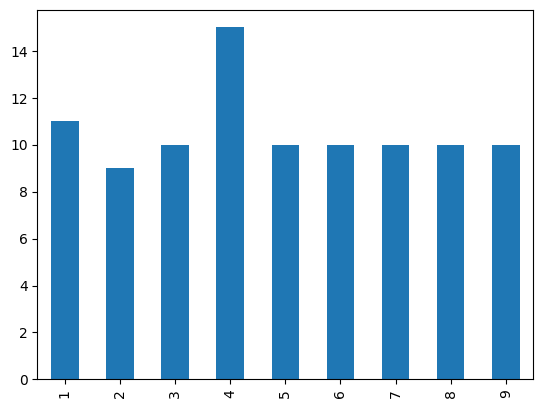

In [20]:
(gantt_recursos.data.loc['Total'].drop('H_total').plot(kind='bar'));

La demanda del recurso no se encuentra nivelada.
Además, con el máximo disponible de 10 recursos durante los primeros 5 periodos el proyecto no es ejecutable en su estado actual y debe aplicarse el algoritmo de asignación.

### Algoritmo de asignación

##### Asignación en el Periodo 1:

Se propone desplazar la actividad D por ser la actividad no crítica con mayor holgura.

In [21]:
duracion_y_recursos = datos_proyecto[['duration', 'resources']]
duracion_y_recursos = proyecto.desplazar(duracion_y_recursos, 'duration', 'resources', D = 1 )

Suma de cuadrados: 1025.0 



,1,2,3,4,5,6,7,8,9,H_total
A,3.000000,3.000000,3.000000,,,,,,,0.000000
B,1.000000,,,,,,,,,1.000000
C,6.000000,6.000000,,,,,,,,0.000000
D,,1.000000,,,,,,,,1.000000
E,,,,2.000000,2.000000,2.000000,,,,0.000000
F,,,5.000000,5.000000,5.000000,5.000000,5.000000,,,0.000000
G,,,2.000000,,,,,,,1.000000
H,,,,,,,5.000000,,,0.000000
I,,,,3.000000,3.000000,3.000000,,,,1.000000
J,,,,,,,,10.000000,10.000000,0.000000


La actividad *💤D* representa el desplazamiento de la tarea _D_. La siguiente gráfica representa la demanda de recursos tras este desplazamiento.

En esta situación el siguiente periodo problemático es el 4.

##### Asignación en el  Periodo 4:

Se propone desplazar la actividad K por ser la actividad no crítica con mayor holgura.

In [23]:
duracion_y_recursos = proyecto.desplazar(duracion_y_recursos, 'duration', 'resources', K = 1 )

Suma de cuadrados: 1025.0 



,1,2,3,4,5,6,7,8,9,H_total
A,3.000000,3.000000,3.000000,,,,,,,0.000000
B,1.000000,,,,,,,,,1.000000
C,6.000000,6.000000,,,,,,,,0.000000
D,,1.000000,,,,,,,,1.000000
E,,,,2.000000,2.000000,2.000000,,,,0.000000
F,,,5.000000,5.000000,5.000000,5.000000,5.000000,,,0.000000
G,,,2.000000,,,,,,,1.000000
H,,,,,,,5.000000,,,0.000000
I,,,,3.000000,3.000000,3.000000,,,,1.000000
J,,,,,,,,10.000000,10.000000,0.000000


En esta situación el siguiente periodo problemático es el 5.

##### Asignación en el  Periodo 5:

Se propone desplazar la actividad K por ser la actividad no crítica con mayor holgura.

In [24]:
duracion_y_recursos = proyecto.desplazar(duracion_y_recursos, 'duration', 'resources', K = 1 )

Suma de cuadrados: 1025.0 



,1,2,3,4,5,6,7,8,9,H_total
A,3.000000,3.000000,3.000000,,,,,,,0.000000
B,1.000000,,,,,,,,,1.000000
C,6.000000,6.000000,,,,,,,,0.000000
D,,1.000000,,,,,,,,1.000000
E,,,,2.000000,2.000000,2.000000,,,,0.000000
F,,,5.000000,5.000000,5.000000,5.000000,5.000000,,,0.000000
G,,,2.000000,,,,,,,1.000000
H,,,,,,,5.000000,,,0.000000
I,,,,3.000000,3.000000,3.000000,,,,1.000000
J,,,,,,,,10.000000,10.000000,0.000000


En esta situación el proyecto ya es realizable por haberse impuesto el límite de recursos tan sólo en los primeros 5 periodos.

Tras esta asignación la duración del proyecto no ha cambiado. Tampoco ha cambiado el camino crítico. Esto es debido a no haber desplazado ninguna tarea crítica. Sí ha disminuido la holgura de las actividades no obstante.

###### Pert tras la asignación

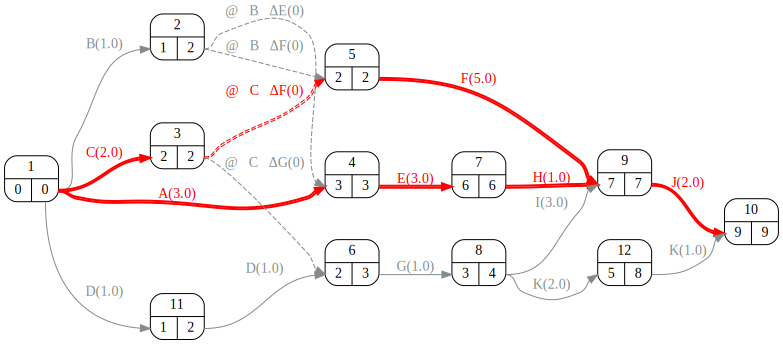

In [26]:
proyecto.pert(durations=duracion_y_recursos['duration'])

In [27]:
proyecto.critical_path(durations=duracion_y_recursos['duration'])

{'Route_3': ['C', '@∇C⤑ΔF', 'F', 'J'], 'Route_6': ['A', 'E', 'H', 'J']}